<a href="https://colab.research.google.com/github/Nishantbhardwaj1999/assighnment/blob/master/Car_logo_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
zip_ref = zipfile.ZipFile('/content/logo_data.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/logo_data/data/train'
valid_path = '/content/logo_data/data/val'

In [4]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 5s 0us/step


In [5]:
for layer in resnet.layers:
    layer.trainable = False

In [6]:
folders = glob('/content/logo_data/data/train/*')

In [7]:
folders

['/content/logo_data/data/train/Fiat',
 '/content/logo_data/data/train/Skoda',
 '/content/logo_data/data/train/unknown',
 '/content/logo_data/data/train/Mercedes-Benz',
 '/content/logo_data/data/train/Honda',
 '/content/logo_data/data/train/Maruti-Suzuki',
 '/content/logo_data/data/train/BMW',
 '/content/logo_data/data/train/Audi',
 '/content/logo_data/data/train/Tata',
 '/content/logo_data/data/train/Nissan',
 '/content/logo_data/data/train/Renault',
 '/content/logo_data/data/train/Volkswagen',
 '/content/logo_data/data/train/Ford',
 '/content/logo_data/data/train/ISUZU',
 '/content/logo_data/data/train/Volvo',
 '/content/logo_data/data/train/Datsun',
 '/content/logo_data/data/train/Hyundai',
 '/content/logo_data/data/train/Jeep',
 '/content/logo_data/data/train/Mahindra',
 '/content/logo_data/data/train/MG',
 '/content/logo_data/data/train/Toyota',
 '/content/logo_data/data/train/Mitsubishi',
 '/content/logo_data/data/train/Kia',
 '/content/logo_data/data/train/Jaguar',
 '/content/lo

In [8]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/logo_data/data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3354 images belonging to 25 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/logo_data/data/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 361 images belonging to 25 classes.


In [15]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-15-69229fe26ea3>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
105/105 [==============================] - 49s 368ms/step - loss: 6.6198 - accuracy: 0.2299 - val_loss: 2.2170 - val_accuracy: 0.4044
Epoch 2/50
105/105 [==============================] - 38s 358ms/step - loss: 2.1348 - accuracy: 0.4574 - val_loss: 1.6019 - val_accuracy: 0.5706
Epoch 3/50
105/105 [==============================] - 38s 357ms/step - loss: 1.7960 - accuracy: 0.5742 - val_loss: 1.2665 - val_accuracy: 0.7147
Epoch 4/50
105/105 [==============================] - 39s 370ms/step - loss: 1.7198 - accuracy: 0.5745 - val_loss: 2.0048 - val_accuracy: 0.5983
Epoch 5/50
105/105 [==============================] - 37s 352ms/step - loss: 1.7109 - accuracy: 0.6082 - val_loss: 1.2904 - val_accuracy: 0.6759
Epoch 6/50
105/105 [==============================] - 37s 354ms/step - loss: 1.3434 - accuracy: 0.6795 - val_loss: 1.3047 - val_accuracy: 0.7258
Epoch 7/50
105/105 [==============================] - 37s 350ms/step - loss: 1.8592 - accuracy: 0.6258 - val_loss: 1.7708 - val_ac

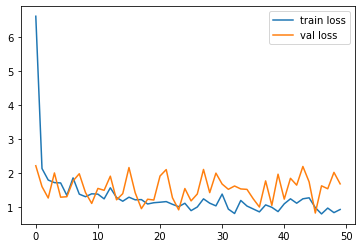

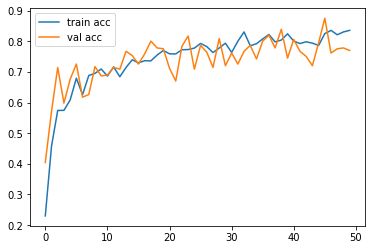

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [18]:
y_pred = model.predict(test_set)

12/12 [==============================] - 3s 110ms/step


In [19]:
y_pred

array([[2.8146042e-20, 4.4602370e-13, 5.2170790e-18, ..., 1.0878130e-11,
        7.4905799e-20, 7.3499895e-12],
       [1.3614682e-05, 8.0748165e-11, 9.5861316e-01, ..., 2.3568229e-07,
        3.0765086e-08, 2.2583883e-06],
       [9.5973656e-25, 2.2334528e-34, 0.0000000e+00, ..., 1.0000000e+00,
        1.6950943e-34, 8.6127155e-31],
       ...,
       [2.0242744e-04, 9.3499979e-04, 1.4273185e-02, ..., 1.4155548e-02,
        2.9848781e-08, 1.4892579e-02],
       [5.4740749e-08, 3.4925569e-02, 1.6805246e-11, ..., 6.1127590e-05,
        5.8472793e-10, 9.9898455e-07],
       [2.2562749e-09, 2.4364641e-11, 6.4062629e-22, ..., 1.3353117e-07,
        2.7443875e-24, 3.7579054e-10]], dtype=float32)

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([14,  2, 22, 17,  6,  3, 11, 21,  2,  1,  1, 16, 11, 19,  9, 20,  6,
        1,  2, 16,  3,  2, 20,  0,  4, 19,  2, 11, 13, 11, 15, 22,  3, 10,
       20,  1,  3, 11,  3,  3, 13, 13, 20,  6,  9, 23, 10, 10, 22,  4, 24,
       22,  4,  9, 15,  3, 13, 13,  0,  8,  4, 24, 15, 15, 23, 16,  6,  7,
       13, 18, 20,  5,  8,  9, 22, 21, 13, 23, 13, 15, 17, 12,  3, 20,  4,
       13,  5, 22,  3,  9,  8, 22, 13, 13, 18,  1,  0, 16, 19,  8, 18,  3,
        7, 22, 18, 10, 13, 16,  2,  7, 22, 13,  9,  8,  7,  9, 17, 18,  3,
        0,  3,  1,  9,  2,  4, 13, 16,  0, 10,  1, 23,  6, 15,  8,  0, 22,
       12,  5,  9, 20, 11,  7, 15,  2,  3,  9, 13, 20,  7, 13, 20,  2,  1,
        9,  3,  5,  3,  0, 14, 13, 11, 12,  9, 10, 10,  4, 11, 22, 13, 13,
       21,  6, 12, 22,  9, 13,  7, 22,  6,  5,  7, 16, 10,  2, 15, 21, 14,
        3,  1, 22, 22,  2,  9,  0,  0,  9, 12,  6,  9,  6, 21, 13,  3, 16,
        5, 11, 11,  4, 15,  3,  9,  8,  9,  2, 12,  2,  7,  9, 22, 24, 20,
       12, 20,  6,  9, 18

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
model=load_model('model_resnet50.h5')

In [42]:
img_data

array([[[[-103.06841 , -115.896645, -122.80549 ],
         [-103.06841 , -115.896645, -122.80549 ],
         [-103.06841 , -115.896645, -122.80549 ],
         ...,
         [-103.072334, -115.91233 , -122.81333 ],
         [-103.072334, -115.91233 , -122.81333 ],
         [-103.072334, -115.91233 , -122.81333 ]],

        [[-103.06841 , -115.896645, -122.80549 ],
         [-103.06841 , -115.896645, -122.80549 ],
         [-103.06841 , -115.896645, -122.80549 ],
         ...,
         [-103.072334, -115.91233 , -122.81333 ],
         [-103.072334, -115.91233 , -122.81333 ],
         [-103.072334, -115.91233 , -122.81333 ]],

        [[-103.06841 , -115.896645, -122.80549 ],
         [-103.06841 , -115.896645, -122.80549 ],
         [-103.06841 , -115.896645, -122.80549 ],
         ...,
         [-103.072334, -115.91233 , -122.81333 ],
         [-103.072334, -115.91233 , -122.81333 ],
         [-103.072334, -115.91233 , -122.81333 ]],

        ...,

        [[-103.0841  , -115.9437  , -1

In [36]:
img=image.load_img('/content/logo_data/data/val/Audi/Audi_02e3cd9e-e562-4bfb-8929-3ce838cd4448.jpg_f28bc3d7-26e7-4db6-91d9-5d8927f78fb4.jpg',target_size=(224,224))

In [37]:
x=image.img_to_array(img)
x

array([[[223., 225., 222.],
        [223., 225., 222.],
        [223., 225., 222.],
        ...,
        [221., 221., 221.],
        [221., 221., 221.],
        [221., 221., 221.]],

       [[223., 225., 222.],
        [223., 225., 222.],
        [223., 225., 222.],
        ...,
        [221., 221., 221.],
        [221., 221., 221.],
        [221., 221., 221.]],

       [[223., 225., 222.],
        [223., 225., 222.],
        [223., 225., 222.],
        ...,
        [221., 221., 221.],
        [221., 221., 221.],
        [221., 221., 221.]],

       ...,

       [[212., 213., 218.],
        [212., 213., 218.],
        [212., 213., 218.],
        ...,
        [203., 202., 216.],
        [203., 202., 216.],
        [203., 202., 216.]],

       [[212., 213., 218.],
        [212., 213., 218.],
        [212., 213., 218.],
        ...,
        [203., 202., 216.],
        [203., 202., 216.],
        [203., 202., 216.]],

       [[212., 213., 218.],
        [212., 213., 218.],
        [212., 2

In [30]:
x.shape

(224, 224, 3)

In [38]:
x=x/255

In [39]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [33]:
model.predict(img_data)

1/1 [==============================] - 2s 2s/step


array([[1.78379358e-15, 4.92119603e-14, 4.50092320e-24, 2.40299338e-24,
        2.88387855e-05, 2.01510920e-04, 4.59969574e-09, 2.59840935e-02,
        1.22492925e-17, 3.11465863e-22, 1.53190594e-16, 1.02976004e-17,
        3.02542247e-31, 9.73694503e-01, 1.14084671e-11, 4.15565738e-18,
        2.80695047e-14, 8.97430291e-05, 1.30689318e-06, 4.17909886e-29,
        1.48175665e-18, 3.58270739e-11, 2.40497620e-15, 5.43205814e-10,
        4.65624930e-17]], dtype=float32)

In [40]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 21ms/step


In [41]:
a

array([13])